In [1]:
import pandas as pd

data = pd.read_csv("NSD2883/NSD2883_no_F2.csv")
data.head()

,Spraak,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,Q1_kultur_kom_6,...,Kommunestr,Fylke,Q49a,Sentralitet,Q57a,Q58a,Q63a,Q67a,Q53a,Q54a
0,1.0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.0,6.0,...,3.0,18,2.0,3.0,5.0,NaN,4.0,9999.0,4.0,2.0
1,1.0,7.0,7.0,7.0,6.0,6.0,7.0,6.0,7.0,7.0,...,3.0,7,5.0,4.0,3.0,NaN,3.0,1.0,4.0,1.0
2,1.0,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.0,6.0,...,3.0,18,5.0,3.0,3.0,NaN,4.0,2.0,2.0,0.0
3,1.0,7.0,6.0,6.0,6.0,6.0,4.0,5.0,8.0,6.0,...,3.0,1,5.0,4.0,4.0,NaN,4.0,1.0,2.0,0.0
4,1.0,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.0,6.0,...,3.0,6,4.0,4.0,1.0,2.0,3.0,1.0,4.0,2.0


In [2]:
data.shape

(50851, 266)

In [3]:
data["Aar"].unique()

array([2019, 2017, 2013, 2010, 2015])

In [4]:
data_2019 = data.loc[data['Aar'] == 2019]
data_2019.shape

(7134, 266)

In [5]:
import numpy as np

def replace_8(data, var):
    data.loc[data[var] == 8,var] = np.nan
    #data[var].unique()
    return data

In [6]:
to_replace_8_komm = ["Q1_natur_kom_1","Q1_natur_kom_2","Q1_natur_kom_3","Q1_kultur_kom_1",
                     "Q1_kultur_kom_2","Q1_kultur_kom_3","Q1_kultur_kom_4","Q1_kultur_kom_5",
                     "Q1_kultur_kom_6","Q1_kultur_kom_7","Q1_arbeid_kom_1","Q1_arbeid_kom_2",
                     "Q1_arbeid_kom_3","Q1_samferdsel_kom_1","Q1_samferdsel_kom_2","Q1_samferdsel_kom_3",
                     "Q1_samferdsel_kom_4","Q1_samferdsel_kom_5", "Q1_samferdsel_kom_6", "Q1_renovasjon_kom_1",
                     "Q1_renovasjon_kom_2","Q2_1","Q3_1","Q3_2","Q3_3", "Q3_4", "Q3_5","Q9_1",
                     "Q9_2","Q9_3","Q9_4","Q9_5","Q9_6","Q9_7","Q9_8","Q9_9","Q9_10","Q9_11",
                     "Q11_1","Q13_1","Q14_1","Q19_1","Q19_2"]


#for var in to_replace_8_komm:
#    data_2019 = replace_8(data_2019, var)

In [7]:
small_data = data_2019[["Q1_natur_kom_1","Q1_natur_kom_2",
                        "Q1_natur_kom_3","Q1_kultur_kom_1",
                        "Q1_kultur_kom_2","Q1_kultur_kom_3",
                        "Alderkat","Q16","Q40a","Q56a","Q61a"
                       ]]




In [8]:
small_data.shape

(7134, 11)

In [9]:
small_data["Q16"].unique()

array([ 7., 14., 11.,  1.,  9., 13.,  5., 12.,  3.,  2., 10.,  8.,  6.,
       nan,  4.])

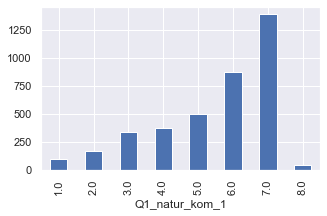

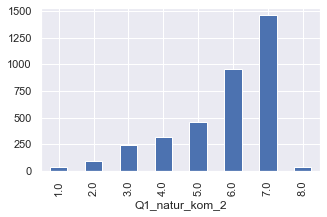

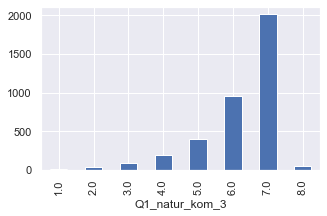

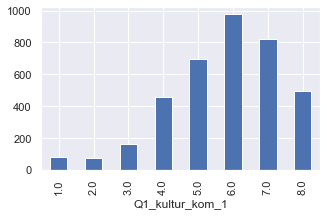

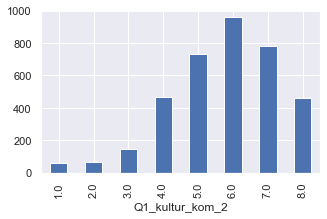

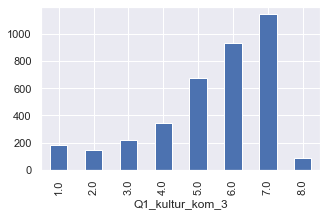

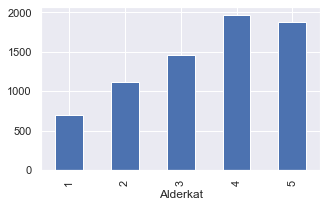

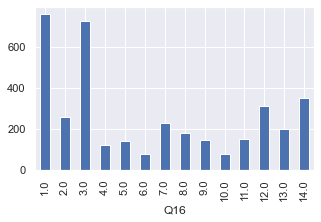

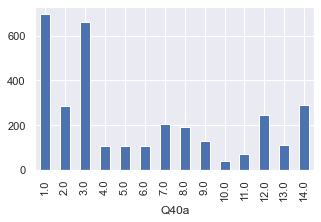

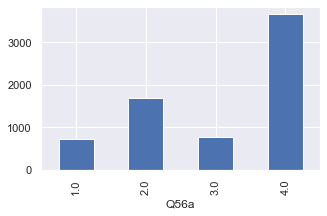

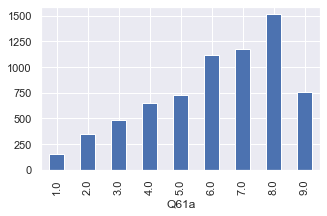

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize':(5,3)})

for col in list(small_data):
    small_data.groupby(col).size().plot(kind='bar')
    plt.show()

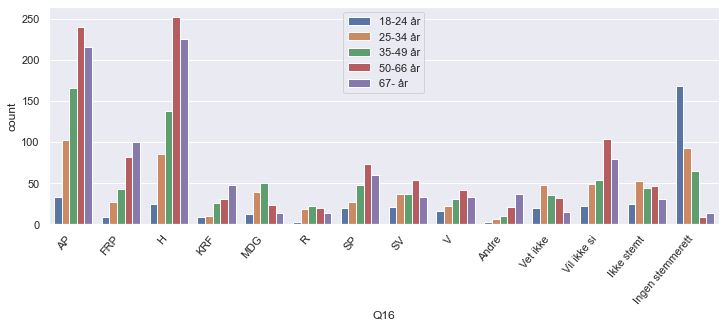

In [11]:
ages=["18-24 år","25-34 år","35-49 år","50-66 år","67- år"]
parties = ["AP","FRP","H","KRF","MDG","R","SP","SV","V","Andre","Vet ikke","Vil ikke si","Ikke stemt","Ingen stemmerett"]
sns.set(rc = {'figure.figsize':(12,4)})


ax = sns.countplot(hue="Alderkat",x="Q16",data=small_data)
ax.legend(ages)
ax.set_xticklabels(parties, rotation=50, ha="right")
plt.show()

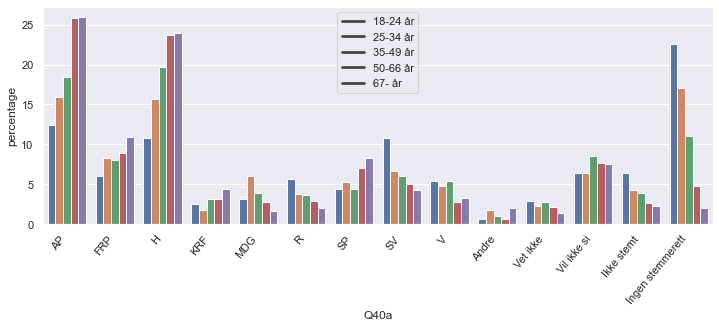

In [12]:
import seaborn as sns
ages=["18-24 år","25-34 år","35-49 år","50-66 år","67- år"]
parties = ["AP","FRP","H","KRF","MDG","R","SP","SV","V","Andre","Vet ikke","Vil ikke si","Ikke stemt","Ingen stemmerett"]
sns.set(rc = {'figure.figsize':(12,4)})

#ax = sns.countplot(hue="Alderkat",x="Q40a",data=small_data, estimator=(lambda x: len(x) / len(small_data) * 100))
#ax.legend(ages)
#ax.set_xticklabels(parties, rotation=50, ha="right")
#plt.show()

agegroup_counts = (small_data.groupby(['Alderkat'])['Q40a']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q40a'))
p = sns.barplot(x="Q40a", y="percentage", hue="Alderkat", data=agegroup_counts)
p.legend(ages)
p.set_xticklabels(parties, rotation=50, ha="right")
_ = plt.setp(p.get_xticklabels(), rotation=50)  # Rotate labels

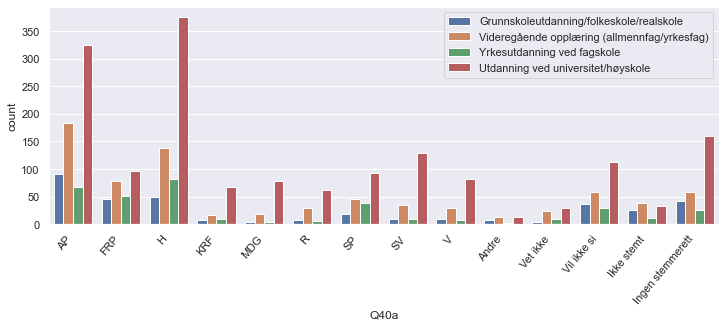

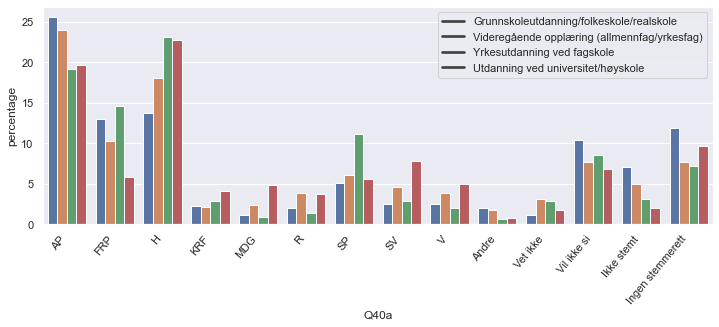

In [13]:
import seaborn as sns
edu=["Grunnskoleutdanning/folkeskole/realskole","Videregående opplæring (allmennfag/yrkesfag)","Yrkesutdanning ved fagskole","Utdanning ved universitet/høyskole"]
parties = ["AP","FRP","H","KRF","MDG","R","SP","SV","V","Andre","Vet ikke","Vil ikke si","Ikke stemt","Ingen stemmerett"]
sns.set(rc = {'figure.figsize':(12,4)})

ax = sns.countplot(hue="Q56a",x="Q40a",data=small_data)
ax.legend(edu)
ax.set_xticklabels(parties, rotation=50, ha="right")
plt.show()

edu_counts = (small_data.groupby(['Q56a'])['Q40a']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q40a'))
p = sns.barplot(x="Q40a", y="percentage", hue="Q56a", data=edu_counts)
p.legend(edu)
p.set_xticklabels(parties, rotation=50, ha="right")
_ = plt.setp(p.get_xticklabels(), rotation=50)  # Rotate labels

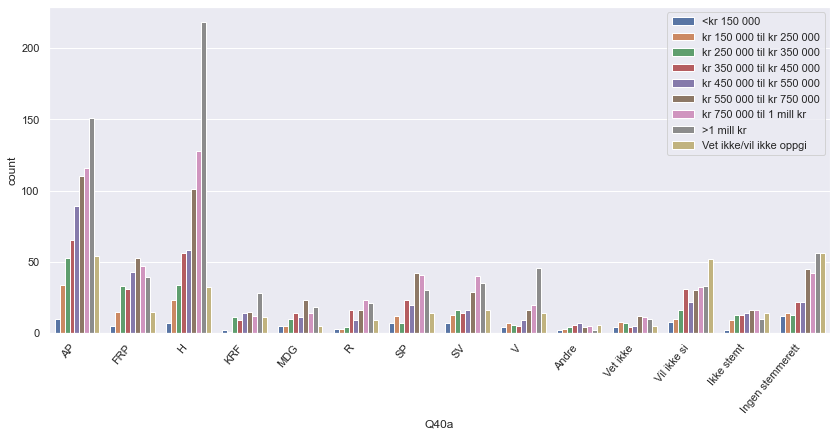

In [25]:
import seaborn as sns
income=["<kr 150 000","kr 150 000 til kr 250 000","kr 250 000 til kr 350 000","kr 350 000 til kr 450 000","kr 450 000 til kr 550 000","kr 550 000 til kr 750 000","kr 750 000 til 1 mill kr",">1 mill kr","Vet ikke/vil ikke oppgi"]
parties = ["AP","FRP","H","KRF","MDG","R","SP","SV","V","Andre","Vet ikke","Vil ikke si","Ikke stemt","Ingen stemmerett"]
sns.set(rc = {'figure.figsize':(14,6)})

ax = sns.countplot(hue="Q61a",x="Q40a",data=small_data)
ax.legend(income)
ax.set_xticklabels(parties, rotation=50, ha="right")
plt.show()


In [38]:
#small_data["Q40a"].unique()

#df = pd.DataFrame({'a':list('abssbab')})
small_data.groupby('Q40a').count()
#print(data_2019[3000:5010])


,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Alderkat,Q16,Q56a,Q61a
Q40a,,,,,,,,,,
1.0,0,0,0,0,0,0,696,0,667,682
2.0,0,0,0,0,0,0,287,0,272,281
3.0,0,0,0,0,0,0,663,0,644,657
4.0,0,0,0,0,0,0,104,0,102,103
5.0,0,0,0,0,0,0,105,0,104,105
6.0,0,0,0,0,0,0,105,0,102,104
7.0,0,0,0,0,0,0,204,0,195,196
8.0,0,0,0,0,0,0,189,0,183,186
9.0,0,0,0,0,0,0,130,0,127,127


In [28]:
import numpy as np
from sklearn.impute import SimpleImputer
print(small_data[3100:3110])

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(small_data)
print(small_data[3100:3110])
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(small_data[:2]))

      Q1_natur_kom_1  Q1_natur_kom_2  Q1_natur_kom_3  Q1_kultur_kom_1  \
3100             6.0             7.0             6.0              5.0   
3101             7.0             6.0             6.0              7.0   
3102             7.0             7.0             7.0              7.0   
3103             6.0             4.0             7.0              4.0   
3104             5.0             7.0             7.0              8.0   
3105             5.0             5.0             5.0              5.0   
3106             4.0             4.0             7.0              7.0   
3107             8.0             1.0             3.0              7.0   
3108             6.0             6.0             6.0              6.0   
3109             5.0             3.0             5.0              1.0   

      Q1_kultur_kom_2  Q1_kultur_kom_3  Alderkat   Q16  Q40a  Q56a  Q61a  
3100              7.0              7.0         5  12.0   NaN   3.0   2.0  
3101              7.0              7.0        

In [27]:
import random

#random.seed(2809)
#random.shuffle(small_data)
#small_data = small_data[["Alderkat","Q16"]]
#print(small_data["Q16"].unique())

final_test = small_data[:710]
dev_test = small_data[710:1420]
train = small_data[1420:]

vars = ["Alderkat","Q16"]
for var in vars:
    print(var + str(train[var].unique()))

Alderkat[1 4 2 3 5]
Q16[ 7.  1. 14. 13.  3.  8.  4. 12.  2. 11. 10.  5.  9. nan  6.]


In [95]:
from sklearn import tree

print(train.shape)
#train = train.drop([train["Q16"].notna()])
#train.replace([np.inf, -np.inf], np.nan, inplace=True)
train = train.dropna()

print(train)
#for var in vars:
#    print(var + str(train[var].unique()))

tar = train["Q16"]
tra = train.drop(['Q16'],axis=1).values


clf = tree.DecisionTreeClassifier()
clf = clf.fit(tra, tar)

(5714, 2)
      Alderkat   Q16
1420         1   7.0
1421         4   1.0
1422         2  14.0
1423         2  13.0
1424         3   1.0
...        ...   ...
5890         3   3.0
5899         2   3.0
5945         3   1.0
5961         3  14.0
5963         2   1.0

[2331 rows x 2 columns]


In [96]:
clf.predict([[4]])

array([3.])

In [136]:
clf.predict([[1]])

array([14.])

In [137]:
clf.predict_proba([[1]])

array([[0.0746888 , 0.02489627, 0.08298755, 0.02074689, 0.04149378,
        0.00829876, 0.04979253, 0.04564315, 0.04149378, 0.00829876,
        0.04149378, 0.04564315, 0.0746888 , 0.43983402]])

[Text(292.95000000000005, 285.39000000000004, 'X[0] <= 1.5\ngini = 0.883\nsamples = 2331\nvalue = [485, 171, 454, 74, 82, 48, 131, 114, 100, 46, 89\n194, 123, 220]'),
 Text(195.3, 203.85000000000002, 'gini = 0.776\nsamples = 241\nvalue = [18, 6, 20, 5, 10, 2, 12, 11, 10, 2, 10, 11, 18\n106]'),
 Text(390.6, 203.85000000000002, 'X[0] <= 3.5\ngini = 0.875\nsamples = 2090\nvalue = [467, 165, 434, 69, 72, 46, 119, 103, 90, 44, 79\n183, 105, 114]'),
 Text(195.3, 122.31, 'X[0] <= 2.5\ngini = 0.891\nsamples = 871\nvalue = [174, 47, 148, 17, 44, 26, 47, 46, 41, 12, 50, 61\n58, 100]'),
 Text(97.65, 40.76999999999998, 'gini = 0.893\nsamples = 389\nvalue = [66, 17, 62, 7, 19, 11, 16, 24, 16, 5, 26, 29\n32, 59]'),
 Text(292.95000000000005, 40.76999999999998, 'gini = 0.884\nsamples = 482\nvalue = [108, 30, 86, 10, 25, 15, 31, 22, 25, 7, 24, 32\n26, 41]'),
 Text(585.9000000000001, 122.31, 'X[0] <= 4.5\ngini = 0.855\nsamples = 1219\nvalue = [293, 118, 286, 52, 28, 20, 72, 57, 49, 32, 29\n122, 47, 14]'

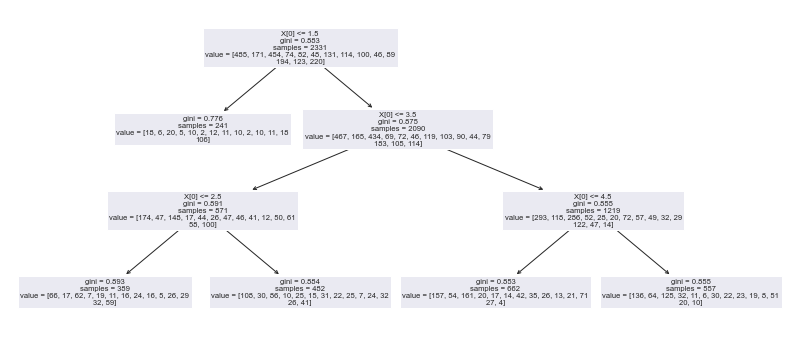

In [100]:
tree.plot_tree(clf)